In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices('GPU') # to check if tf detects my GPU

[]

In [4]:
# Parameters
batch_size = 16
image_height = 256
image_width = 256
n_cheeses = 5
n_epochs = 40
folder_path = r"./dataset"

# Useful functions
def load_images_paths(path):
    '''Load the path to each image in an array'''
    images_array = [os.path.join(folder_path,file) for file in os.listdir(path)]
    return images_array

def load_image(path):
    '''Load one image using its path'''
    image = cv2.imread(path)
    return image

def display_image(image):
    '''Display one image'''
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # cv2 is BGR and pyplot RGB so need to convert to display
    plt.imshow(image_rgb)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def normalize_image(image):
    '''Normaize image to [0,255]'''
    normalized_image= cv2.normalize(image, 0, 255, dtype = cv2.CV_32F) # if not using float data type then rounds up to either 0 or 1 integers
    return normalized_image

In [5]:
# Loading the datasets
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(folder_path, validation_split = 0.2, subset = "training", seed = 123, image_size = (image_height, image_width), batch_size = batch_size)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(folder_path, validation_split = 0.2, subset = "validation", seed = 123, image_size = (image_height, image_width), batch_size = batch_size)
labels = training_dataset.class_names

Found 1858 files belonging to 5 classes.
Using 1487 files for training.
Found 1858 files belonging to 5 classes.
Using 371 files for validation.


In [6]:
# Building the model
model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"), # 32 = number of filters, 3 = kernel size,
                                                                 # padding = not to reduce dimension when using the
                                                                 # kernels
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])

# Training/validation
history = model.fit(training_dataset,
                    validation_data = validation_dataset,
                    epochs = n_epochs)

model.summary()

Epoch 1/40
93/93 [==============================] - 38s 405ms/step - loss: 1.6066 - accuracy: 0.2616 - val_loss: 1.5283 - val_accuracy: 0.2884
Epoch 2/40
93/93 [==============================] - 36s 387ms/step - loss: 1.4598 - accuracy: 0.3685 - val_loss: 1.4312 - val_accuracy: 0.3235
Epoch 3/40
93/93 [==============================] - 36s 389ms/step - loss: 1.2472 - accuracy: 0.4539 - val_loss: 1.3929 - val_accuracy: 0.3881
Epoch 4/40
93/93 [==============================] - 32s 342ms/step - loss: 1.0102 - accuracy: 0.5992 - val_loss: 1.5000 - val_accuracy: 0.3881
Epoch 5/40
93/93 [==============================] - 32s 345ms/step - loss: 0.6823 - accuracy: 0.7209 - val_loss: 1.9706 - val_accuracy: 0.4232
Epoch 6/40
93/93 [==============================] - 34s 371ms/step - loss: 0.4743 - accuracy: 0.8151 - val_loss: 2.1653 - val_accuracy: 0.4852
Epoch 7/40
93/93 [==============================] - 36s 388ms/step - loss: 0.3026 - accuracy: 0.8911 - val_loss: 3.2947 - val_accuracy: 0.4609

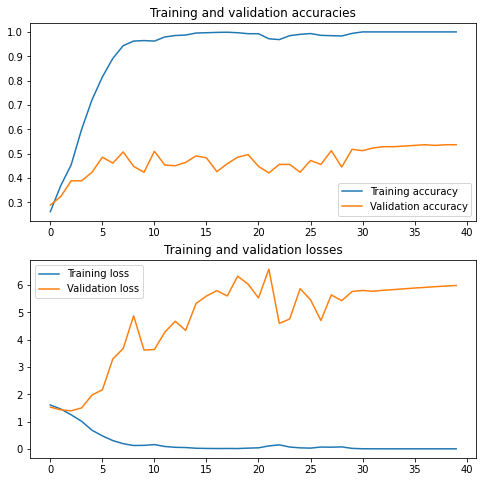

In [8]:
# Some graphs about accuracy
accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
validation_loss = history.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs), accuracy, label="Training accuracy")
plt.plot(range(n_epochs), validation_accuracy, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs), loss, label="Training loss")
plt.plot(range(n_epochs), validation_loss, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

#plt.savefig("cheezam-cnn1")

In [9]:
# Building another model - with dropout layer to avoid overfitting
model2 = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"), # 32 = number of filters, 3 = kernel size,
                                                                 # padding = not to reduce dimension when using the
                                                                 # kernels
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model2.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])

# Training/validation
history2 = model2.fit(training_dataset,
                      validation_data = validation_dataset,
                      epochs = n_epochs) # Train this one a little longer 

Epoch 1/40
93/93 [==============================] - 43s 454ms/step - loss: 1.9023 - accuracy: 0.2603 - val_loss: 1.5158 - val_accuracy: 0.2830
Epoch 2/40
93/93 [==============================] - 42s 452ms/step - loss: 1.5431 - accuracy: 0.3040 - val_loss: 1.5954 - val_accuracy: 0.2022
Epoch 3/40
93/93 [==============================] - 41s 439ms/step - loss: 1.4873 - accuracy: 0.3410 - val_loss: 1.5695 - val_accuracy: 0.2453
Epoch 4/40
93/93 [==============================] - 41s 439ms/step - loss: 1.3198 - accuracy: 0.4398 - val_loss: 1.4502 - val_accuracy: 0.3477
Epoch 5/40
93/93 [==============================] - 42s 450ms/step - loss: 1.0330 - accuracy: 0.5824 - val_loss: 1.3809 - val_accuracy: 0.3827
Epoch 6/40
93/93 [==============================] - 42s 451ms/step - loss: 0.8183 - accuracy: 0.6725 - val_loss: 1.6553 - val_accuracy: 0.3127
Epoch 7/40
93/93 [==============================] - 41s 436ms/step - loss: 0.5567 - accuracy: 0.7801 - val_loss: 1.6451 - val_accuracy: 0.3558

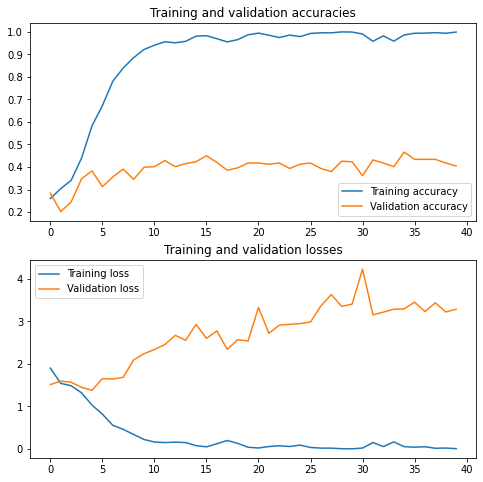

In [10]:
# Some graphs about accuracy
accuracy2 = history2.history["accuracy"]
validation_accuracy2 = history2.history["val_accuracy"]
loss2 = history2.history["loss"]
validation_loss2 = history2.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs), accuracy2, label="Training accuracy")
plt.plot(range(n_epochs), validation_accuracy2, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs), loss2, label="Training loss")
plt.plot(range(n_epochs), validation_loss2, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

#plt.savefig("cheezam-cnn2")

In [11]:
# Building another model - with data augmentation to get more images
model3 = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal", input_shape = (image_height, image_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"), # 32 = number of filters, 3 = kernel size,
                                                                 # padding = not to reduce dimension when using the
                                                                 # kernels
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model3.compile(optimizer = "adam",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])
#n_epochs = 100
# Training/validation
history3 = model3.fit(training_dataset,
                      validation_data = validation_dataset,
                      epochs = n_epochs)

Epoch 1/40
93/93 [==============================] - 44s 457ms/step - loss: 1.6311 - accuracy: 0.2596 - val_loss: 1.6045 - val_accuracy: 0.2561
Epoch 2/40
93/93 [==============================] - 43s 460ms/step - loss: 1.5369 - accuracy: 0.3033 - val_loss: 1.6191 - val_accuracy: 0.2426
Epoch 3/40
93/93 [==============================] - 42s 446ms/step - loss: 1.5311 - accuracy: 0.3181 - val_loss: 1.6054 - val_accuracy: 0.2588
Epoch 4/40
93/93 [==============================] - 42s 446ms/step - loss: 1.5320 - accuracy: 0.3087 - val_loss: 1.6413 - val_accuracy: 0.2507
Epoch 5/40
93/93 [==============================] - 42s 449ms/step - loss: 1.4994 - accuracy: 0.3275 - val_loss: 1.5457 - val_accuracy: 0.2722
Epoch 6/40
93/93 [==============================] - 43s 461ms/step - loss: 1.3962 - accuracy: 0.3826 - val_loss: 1.4129 - val_accuracy: 0.3477
Epoch 7/40
93/93 [==============================] - 41s 440ms/step - loss: 1.3082 - accuracy: 0.4250 - val_loss: 1.3676 - val_accuracy: 0.4070

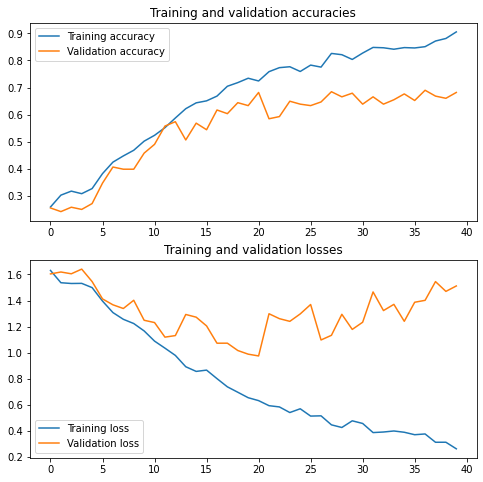

In [12]:
# Some graphs about accuracy
accuracy3 = history3.history["accuracy"]
validation_accuracy3 = history3.history["val_accuracy"]
loss3 = history3.history["loss"]
validation_loss3 = history3.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs), accuracy3, label="Training accuracy")
plt.plot(range(n_epochs), validation_accuracy3, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs), loss3, label="Training loss")
plt.plot(range(n_epochs), validation_loss3, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

#plt.savefig("cheezam-cnn3")

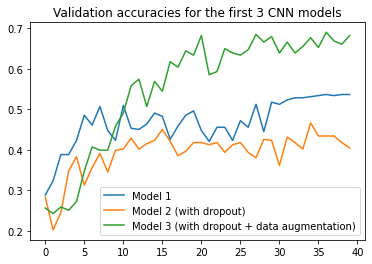

In [14]:
# Comparing all 3 models on validation accuracy
plt.plot(range(n_epochs), validation_accuracy, label="Model 1")
plt.plot(range(n_epochs), validation_accuracy2, label="Model 2 (with dropout)")
plt.plot(range(n_epochs), validation_accuracy3, label="Model 3 (with dropout + data augmentation)")
plt.legend(loc="best")
plt.title("Validation accuracies for the first 3 CNN models")

#plt.savefig("cheezam-cnn4")

In [22]:
# Testing another architecture - VGG 16
n_epochs_VGG = 40
model4 = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal", input_shape = (image_height, image_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(8, 3, padding = "same", activation = "relu"), 
    layers.Conv2D(8, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding = "same", activation = "relu"),
    layers.Conv2D(16, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.Conv2D(32, 3, padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Conv2D(64, 3, padding = "same", activation = "relu"),
    layers.Dropout(.4),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation ="relu"),
    layers.Dense(128, activation ="relu"),
    layers.Dense(n_cheeses, activation = "softmax")
])
# Compiling the model
model4.compile(optimizer = "sgd",
             loss = tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics = ["accuracy"])

# Training/validation
history4 = model4.fit(training_dataset,
                      validation_data = validation_dataset,
                      epochs = n_epochs_VGG) # Train this one a little longer  


ValueError: Unknown optimizer: sdg. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

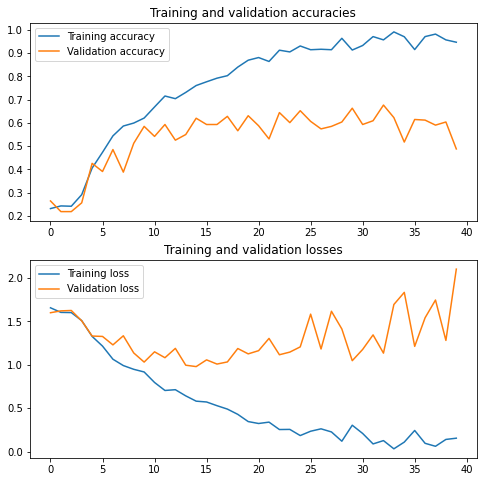

In [16]:
# Some graphs about accuracy
accuracy4 = history4.history["accuracy"]
validation_accuracy4 = history4.history["val_accuracy"]
loss4 = history4.history["loss"]
validation_loss4 = history4.history["val_loss"]

plt.figure(figsize=(8, 8))

plt.subplot(211)
plt.plot(range(n_epochs_VGG), accuracy4, label="Training accuracy")
plt.plot(range(n_epochs_VGG), validation_accuracy4, label="Validation accuracy")
plt.legend(loc="best")
plt.title("Training and validation accuracies")

plt.subplot(212)
plt.plot(range(n_epochs_VGG), loss4, label="Training loss")
plt.plot(range(n_epochs_VGG), validation_loss4, label="Validation loss")
plt.legend(loc="best")
plt.title("Training and validation losses")

plt.savefig("cheezam-cnn5")

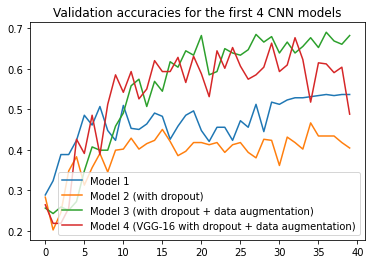

In [19]:
# Comparing all 4 models
plt.plot(range(n_epochs), validation_accuracy, label="Model 1")
plt.plot(range(n_epochs), validation_accuracy2, label="Model 2 (with dropout)")
plt.plot(range(n_epochs), validation_accuracy3, label="Model 3 (with dropout + data augmentation)")
plt.plot(range(n_epochs_VGG), validation_accuracy4, label="Model 4 (VGG-16 with dropout + data augmentation)")
plt.legend(loc="best")
plt.title("Validation accuracies for the first 4 CNN models")

plt.savefig("cheezam-all")